<a href="https://colab.research.google.com/github/AlyssaIssury/-Assignment-_2/blob/main/enron_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [32]:
#Connect to the Enron Email 

!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-06-04 14:49:39--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Units/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-06-04 14:49:40--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Units/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  76.1MB/s    in 15s     

2023-06-04 14:49:56 (54.3 MB/s

In [1]:
#Import of sqlite3
import sqlite3

In [3]:
conn = sqlite3.connect("enron.db")

In [4]:
cur = conn.cursor()

In [5]:
sql = """
SELECT name
FROM sqlite_master
WHERE type = "table";
"""
cur.execute(sql)
cur.fetchall()


[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [6]:
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [7]:
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [8]:
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [9]:
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [10]:
import pandas as pd

sql='''
SELECT * from employeelist;
'''

employeelist_df = pd.read_sql_query(sql, conn)
employeelist_df 

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [11]:
import pandas as pd

sql='''
SELECT * from message;
'''

message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [12]:
import pandas as pd

sql='''
SELECT * from recipientinfo;
'''

recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [13]:
employeelist_df.info()
employeelist_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   eid        149 non-null    int64 
 1   firstName  149 non-null    object
 2   lastName   149 non-null    object
 3   Email_id   149 non-null    object
 4   Email2     149 non-null    object
 5   Email3     149 non-null    object
 6   EMail4     149 non-null    object
 7   folder     149 non-null    object
 8   status     148 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.6+ KB


,eid
count,149.000000
mean,75.067114
std,43.266094
min,1.000000
25%,38.000000
50%,75.000000
75%,112.000000
max,150.000000


In [ ]:
message_df.info()
message_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


,mid
count,252759.000000
mean,190260.434980
std,115507.436258
min,52.000000
25%,88564.500000
50%,186421.000000
75%,279961.500000
max,404927.000000


In [ ]:
recipientinfo_df.info()
recipientinfo_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064442 entries, 0 to 2064441
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   rid     int64 
 1   mid     int64 
 2   rtype   object
 3   rvalue  object
 4   dater   object
dtypes: int64(2), object(3)
memory usage: 78.8+ MB


,rid,mid
count,2.064442e+06,2.064442e+06
mean,1.543862e+06,1.961676e+05
std,9.372586e+05,1.136388e+05
min,6.700000e+01,5.200000e+01
25%,7.182892e+05,1.054380e+05
50%,1.515296e+06,1.982630e+05
75%,2.309682e+06,2.806730e+05
max,3.242063e+06,4.049270e+05


In [ ]:
referenceinfo_df.info()
referenceinfo_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rfid       54778 non-null  int64 
 1   mid        54778 non-null  int64 
 2   reference  54778 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


,rfid,mid
count,54778.000000,54778.000000
mean,30860.203640,179737.939446
std,18390.880347,117795.929178
min,2.000000,79.000000
25%,14305.250000,60579.500000
50%,30986.500000,178175.500000
75%,46727.750000,275556.750000
max,63024.000000,404920.000000


In [ ]:
condition = message_df['date']
condition 

0         2000-01-21 04:51:00
1         2000-01-24 01:37:00
2         2000-01-24 02:06:00
3         2000-02-02 10:21:00
4         2000-02-07 22:16:00
                 ...         
252754    2002-02-06 16:51:29
252755    2002-02-06 17:17:39
252756    2002-02-06 20:09:37
252757    2002-02-07 04:38:13
252758    2002-02-07 05:38:14
Name: date, Length: 252759, dtype: object

# Email Traffic overtime 

In [14]:
sql ="""

SELECT strftime('%Y/%d', date)
As date,
COUNT(*) AS count FROM message
GROUP BY date 

"""


messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df 

,date,count
0,0001/30,2
1,0001/18,1
2,0001/24,1
3,0001/01,1
4,0001/06,1
...,...,...
194082,2020/29,1
194083,2043/28,1
194084,2044/02,1
194085,2044/04,1


In [15]:
sql ="""

SELECT strftime('%Y/%w', date)
As date,
COUNT(*) AS count FROM message
GROUP BY date 

"""


messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df 

,date,count
0,0001/3,2
1,0001/1,1
2,0001/2,1
3,0001/3,1
4,0001/1,1
...,...,...
194082,2020/2,1
194083,2043/1,1
194084,2044/6,1
194085,2044/1,1


In [16]:
sql ="""

SELECT strftime('%Y/%m', date)
As date,
COUNT(*) AS count FROM message
GROUP BY date 

"""


messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df 

,date,count
0,0001/05,2
1,0001/06,1
2,0001/07,1
3,0001/08,1
4,0001/08,1
...,...,...
194082,2020/12,1
194083,2043/12,1
194084,2044/01,1
194085,2044/01,1


In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns 

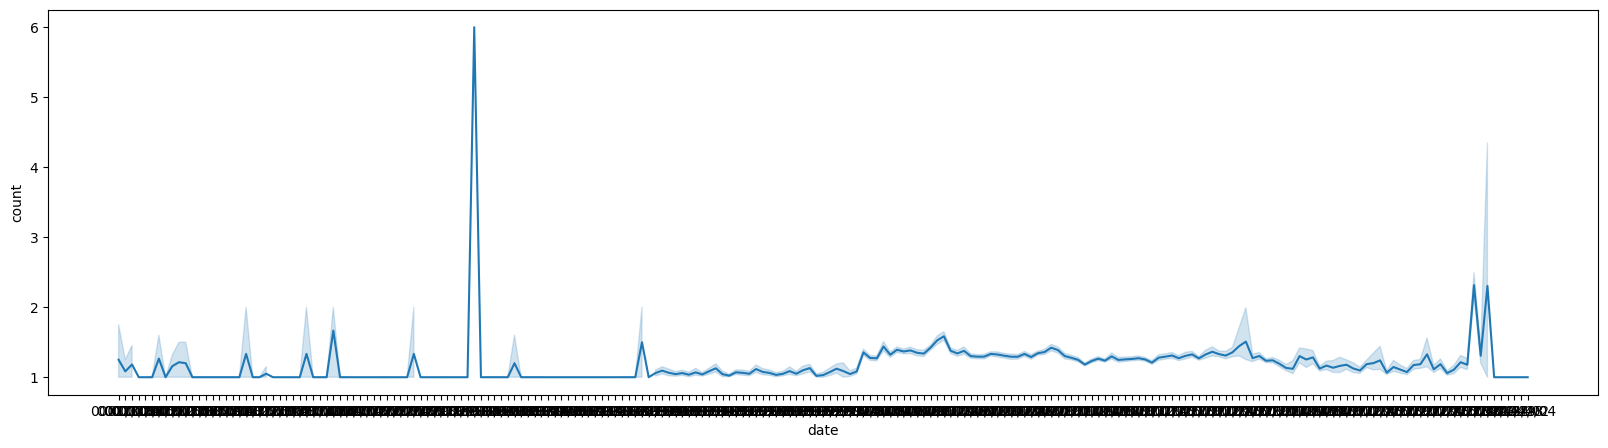

In [19]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='count', data=messageperday_df)
plt.show()


### Perform analysis

As it can be seen both in the graphs and in the dataframes there are ups and downs in the amount per day for example at the end of the first half, the number of message/email is at its' peak but after this it casually decreases and will not reach this amount ever again. 

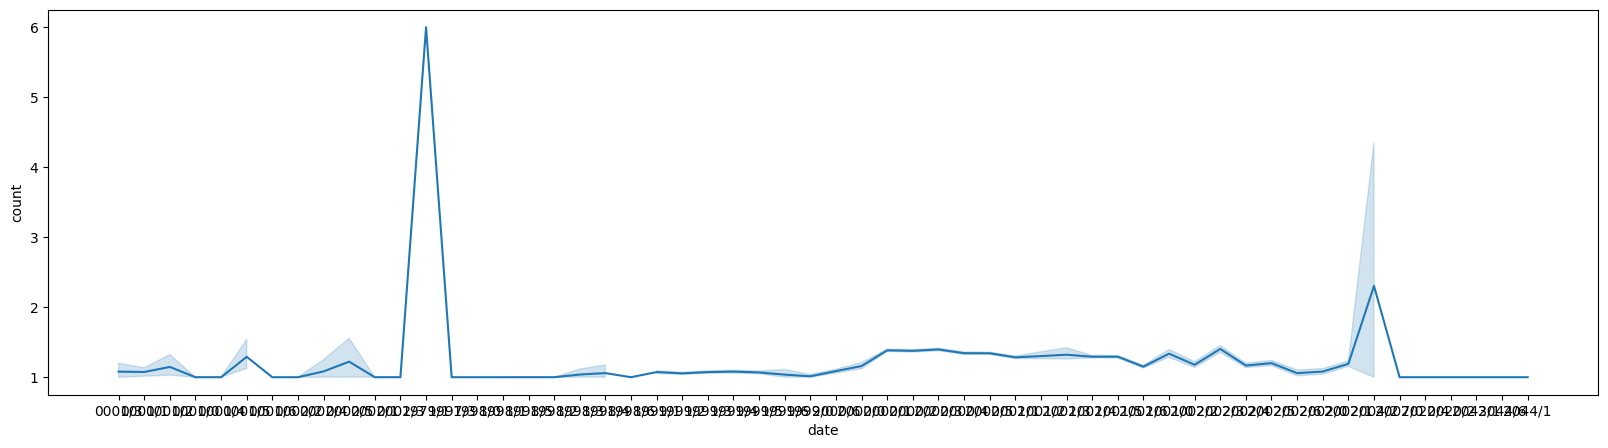

In [20]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='count', data=messageperweek_df)
plt.show() 

### Perform analysis 

For the amount per week, it is similar to the one per day as the count will be at its' peak at the end of the first half then it will drop and not reach this amount ever again. However, in the end it will increase by a little bit again. 

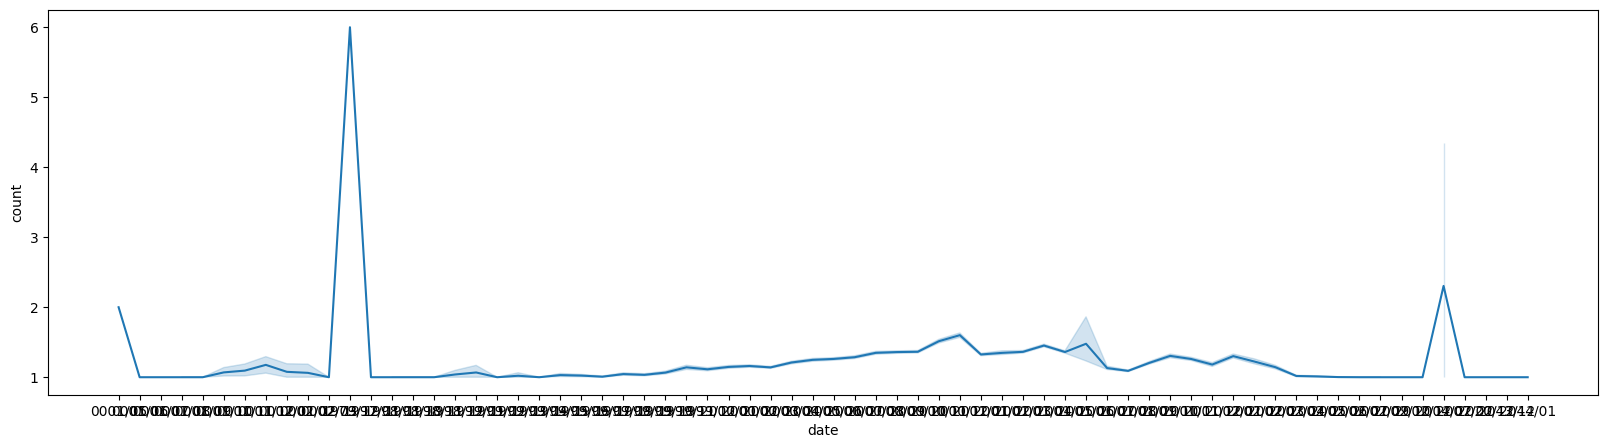

In [21]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='count', data=messagepermonth_df)
plt.show()

### Perform analysis 

For the amount per month it will be a bit like for day and week because the count is at its' highest only at first then it will drop before the end. The codes stay almost the same, the only detail that will change is 'day', 'week' and 'month'. Apart from that everything stays the and logically after running the codes there will be some changes as well between each codes. 

# Top senders and recipients 

In [22]:
sql_sender = """
SELECT sender,COUNT(*)
AS count
FROM message
Group by sender
order by count
desc
Limit 15
"""

In [23]:
Topsenders_df = pd.read_sql_query(sql_sender,conn)
Topsenders_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


In [24]:
print(Topsenders_df)

                           sender  count
0         jeff.dasovich@enron.com   6273
1            j.kaminski@enron.com   5838
2              kay.mann@enron.com   5100
3       sara.shackleton@enron.com   4797
4            tana.jones@enron.com   4437
5         chris.germany@enron.com   3686
6            no.address@enron.com   3511
7   enron.announcements@enron.com   2838
8       matthew.lenhart@enron.com   2784
9     debra.perlingiere@enron.com   2549
10           pete.davis@enron.com   2500
11        steven.j.kean@enron.com   2278
12         gerald.nemec@enron.com   2275
13      james.d.steffes@enron.com   2161
14        mark.e.taylor@enron.com   2146


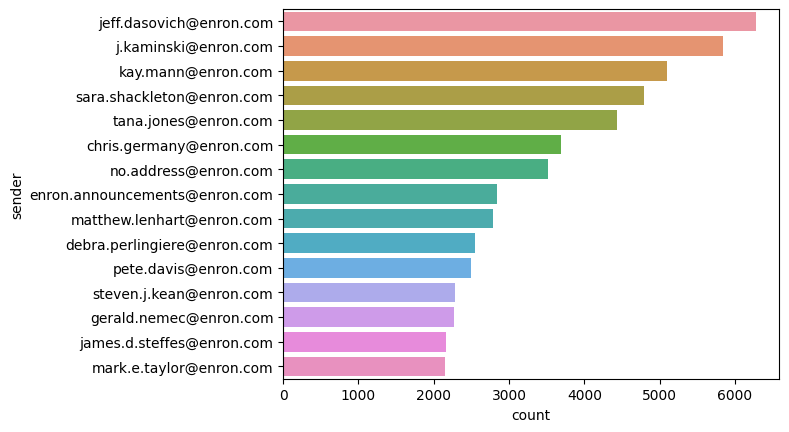

In [25]:
data = Topsenders_df
sns.barplot(x="count",y="sender",data=data)
plt.show()

### Perform analysis

This analysis is mainly for top senders and recipents. It can be seen that the top sender is Jeff and the lowest one is Mark.e.Taylor. The codes in this one is mainly to count and convert the top senders into dataframe as well as graph (barplot) 

In [26]:
sql_recipient = """
SELECT rvalue,COUNT(*)
AS count
FROM Recipientinfo
Group by rvalue
order by count
desc
Limit 15
"""

In [27]:
Toprecipients_df = pd.read_sql_query(sql_recipient,conn)
Toprecipients_df

,rvalue,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


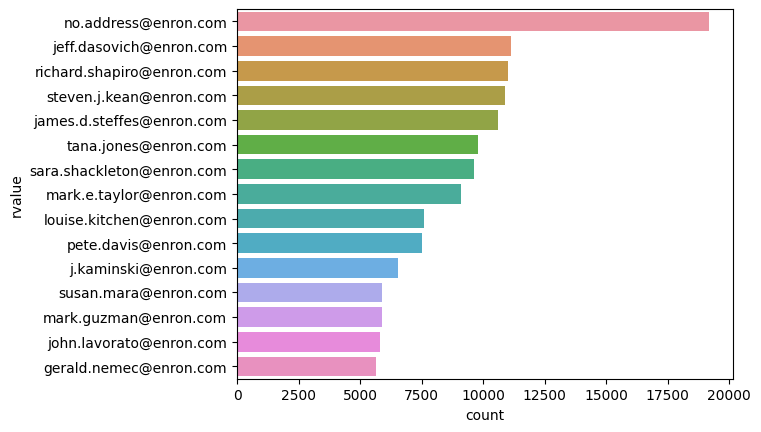

In [28]:
data2 = Toprecipients_df
sns.barplot(x="count",y="rvalue",data=data2)
plt.show()

### Perform analysis

In this one, no address is at the highest and gerald is the lowest. the rvalue is mainly to take data from a different database than the previous one. 

# Email Distribution By Recipient Type

In [29]:
sql_rtype = """
SELECT rtype, COUNT(*) AS count
FROM Recipientinfo
GROUP BY rtype;
"""

In [30]:
result = conn.execute(sql_rtype).fetchall()
df = pd.DataFrame(result, columns=['rtype', 'count'])
print(df)

  rtype    count
0   BCC   253713
1    CC   253735
2    TO  1556994


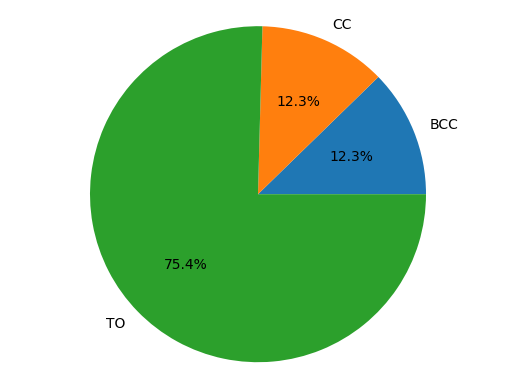

In [31]:
plt.pie(df['count'], labels=df['rtype'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Perform analysis

This last part is focused mainly on the distribution of email by the type of recipient. The first code is to count, the second one to convert as well as display into a dataframe and finally the last one is to see it in a simpler way on a pie chart. 

Using SQLite3 and Python, I successfully downloaded and linked to the Enron email database.
'employeelist,''message,''recipientinfo,' and'referenceinfo' are among the tables in the database.
Using SQL queries, I extracted precise information on the fields and data types in each table.
Dataframes were created to analyse the 'employeelist','message', and'recipientinfo' tables.
Using line plots, I calculated and visualised the amount of messages sent every day, week, and month.
The analysis of message counts over time indicated that email traffic fluctuated, with peaks and dips.
Using bar plots, I identified and visualised the top email senders and receivers.
A pie chart was used to represent the findings of an analysis of email distribution by receiver type.

Limitations and Potential Enhancements:


Only a portion of the Enron email database tables were evaluated. Exploring additional tables and their linkages may offer a more complete picture of the data.
The research focused on metadata rather than the substance of the emails. Text analysis tools might give extra useful information.
The study did not adjust for missing or incomplete data. Missing value handling and data quality concerns would increase accuracy and dependability.
More complex SQL queries or Python modules built for large-scale data processing might be used to optimise the code for efficiency.
 Python Notebooks Reflection:

Python notebooks, such as Jupyter or Colab, provide a handy and interactive data analysis environment. They offer a versatile workflow that incorporates code execution, visualisations, and documentation. Some thoughts on their usefulness and efficacy are as follows:

Python notebooks enable a flexible workflow in which code, visualisations, and written explanations may all be seamlessly combined, making it easy to document and share the analytical process.
Reproducibility: Notebooks provide reproducible analysis by recording the code and its execution step by step, allowing others to duplicate and verify the results.
Collaboration: Because numerous users may work on the same notebook at the same time, Python notebooks make it easy to exchange ideas and insights.
Data Visualisation: Notebooks facilitate data integration.
